<center><font face="Times New ROman" size="10" color="#000080">- NA09 -</font></center>
<br>
<br><center><font face="Times New ROman" size="6" color="#000000">- Importando os Dados -</font>

In [2]:
%matplotlib inline
from pylab import *
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
#----------------------------------------#
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator
#----------------------------------------#
name = 'na-09'

In [3]:
#--------------------------Armazenando os Dados-------------------------------#

data  = np.fromfile('NA09D.dat', dtype=float, count=-1, sep='	')

p  = len(data)/6 

print len(data),'- comprimento original, antes da divisao'
print p,'- comprimento de uma unica coluna'

data  = np.reshape(data, (len(data)/6,6))

7878 - comprimento original, antes da divisao
1313 - comprimento de uma unica coluna


In [4]:
#--------------------------As propriedades petrofisicas do poco-------------------------------#

prof = data[:,0] # profundidade em metros
DTP  = data[:,1] # DTp em us/ft
GR   = data[:,2] # GR em unidades API
ILD  = data[:,3] # ILD em Ohm.m
PHIN = data[:,4] # PHIN em %
RHOb = data[:,5] # RHOb em g/cm3

print prof[0],DTP[0],GR[0],ILD[0],PHIN[0],RHOb[0]

2950.0556 78.508 82.5 1.7724 -999.0 -999.0


/home/mita/.anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2562: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-999.0, right=-999.0
  'left=%s, right=%s') % (left, right))


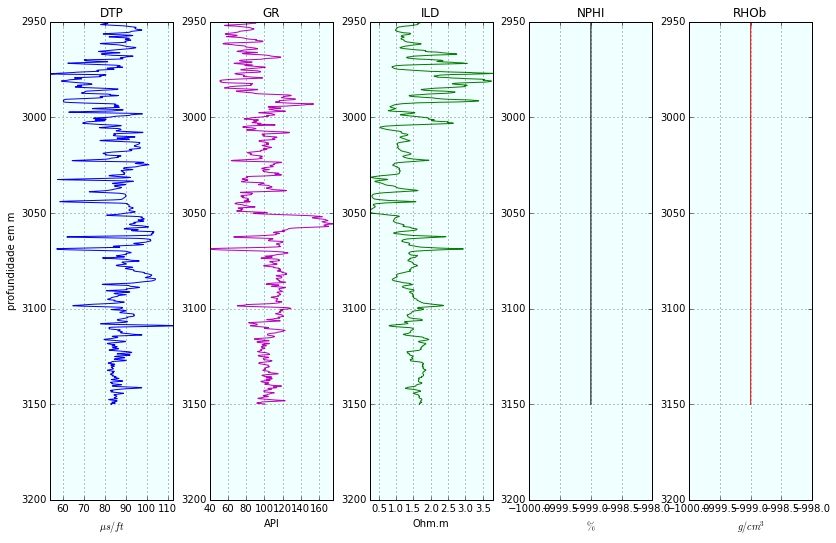

In [5]:
#--------------------------Transformando os dados em gráficos-------------------------------#

fig = plt.figure(figsize= (16,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

ax2 = fig.add_subplot(6,6,1, axisbg='#F0FFFF')   

ax2.plot(DTP,prof,'-b',linewidth = 1) # repare que está DTP x prof, ou seja, Sonico(x) e profundidade(y)

ax2.set_title('DTP')     # aqui o titulo 
ax2.set_xlabel('$\mu s/ft$')        # aqui o que representa o eixo x
ax2.set_ylabel('profundidade em m')   # aqui o que representa o eixo y

plt.gca().invert_yaxis()              # invertendo o eixo y pois a profundidade aumenta para baixo

plt.xlim(xmax=max(DTP),xmin=min(DTP)) # aqui determinamos o valor maximo e minimo de DTP como limites do grafico
plt.grid()                            # adicionamos o grid    

#________________________________________________

ax3 = fig.add_subplot(6,6,2, axisbg='#F0FFFF') 
ax3.plot(GR,prof,'-m',linewidth = 1) # aqui é GR x prof, gamma ray(x) por profundidade(y)
ax3.set_title('GR')
ax3.set_xlabel('API')

plt.gca().invert_yaxis()

plt.xlim(xmax=max(GR),xmin=min(GR))
plt.grid()

#_________________________________________________

ax4 = fig.add_subplot(6,6,3, axisbg='#F0FFFF')
ax4.plot(ILD,prof,'-g',linewidth = 1)
ax4.set_title('ILD')
ax4.set_xlabel('Ohm.m')

plt.gca().invert_yaxis()

plt.xlim(xmax=max(ILD),xmin=min(ILD))
plt.grid()

#_________________________________________________

ax5 = fig.add_subplot(6,6,4, axisbg='#F0FFFF')
ax5.plot(PHIN,prof,'-k',linewidth = 1)
ax5.set_title('NPHI')
ax5.set_xlabel('$\%$')

plt.gca().invert_yaxis()

plt.xlim(xmax=max(PHIN),xmin=min(PHIN))
plt.grid()

#_________________________________________________

ax6 = fig.add_subplot(6,6,5, axisbg='#F0FFFF')
ax6.plot(RHOb,prof,'-r',linewidth = 1)
ax6.set_title('RHOb')
ax6.set_xlabel('$g/cm^3$')

plt.gca().invert_yaxis()

plt.xlim(xmax=max(RHOb),xmin=min(RHOb))
plt.grid()

plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Correções -</font>


<br>  -> $\rho_b (GR,VP) = 1.97 - 1.50^{-3} GR + 0.10 VP$ - Augusto
<br>  -> $\rho_b (GR,VP) = 1.97 - 1.50.10^{-3} GR + 1.038.10^{-4} VP$ - Augusto corrigido
<br>  -> $\phi_N (GR,\rho_ b) = 75.40 + 0.90 GR - 24.37 \rho_b $ - Augusto

In [6]:
#------------------------------Interpolacao RHOb -999.00000 

cfvp = 3.2808*(10**(-6)) # conversao us/ft -> s/m

VP=[] # velocidade de onda P
for i in range(p):
    VP.append(1.0000/(cfvp*DTP[i]))

RHOb2 = []

for i in range (p):
    RHOb2.append(  1.97 -  ((1.50*(10**(-3)))*GR[i]) + (1.038*(10**(-4)))*VP[i] )

for i in range (p):
    RHOb[i] = RHOb2[i]
        
print RHOb
#------------------------------Correcao Augusto


[ 2.24924874  2.25194713  2.24737424 ...,  2.2059936   2.20310316
  2.19887169]


In [7]:
#------------------------------Interpolacao PHIN -999.00000 
PHIN2 = []

for i in range (p):
    PHIN2.append(75.40 + (0.09*GR[i]) - (24.37*RHOb[i]))

for i in range (p):
    if PHIN[i] == -999.000:
        PHIN[i] = PHIN2[i]
        
print PHIN[0]
#------------------------------Correcao Augusto

28.0108083162


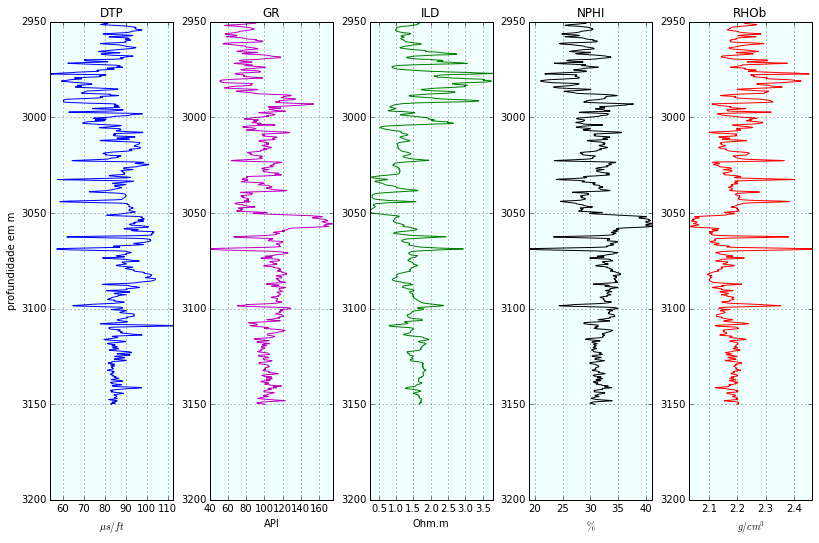

In [8]:
#--------------------------Transformando os dados em gráficos-------------------------------#

fig = plt.figure(figsize= (16,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

ax2 = fig.add_subplot(6,6,1, axisbg='#F0FFFF')   

ax2.plot(DTP,prof,'-b',linewidth = 1) # repare que está DTP x prof, ou seja, Sonico(x) e profundidade(y)

ax2.set_title('DTP')     # aqui o titulo 
ax2.set_xlabel('$\mu s/ft$')        # aqui o que representa o eixo x
ax2.set_ylabel('profundidade em m')   # aqui o que representa o eixo y

plt.gca().invert_yaxis()              # invertendo o eixo y pois a profundidade aumenta para baixo

plt.xlim(xmax=max(DTP),xmin=min(DTP)) # aqui determinamos o valor maximo e minimo de DTP como limites do grafico
plt.grid()                            # adicionamos o grid    

#________________________________________________

ax3 = fig.add_subplot(6,6,2, axisbg='#F0FFFF') 
ax3.plot(GR,prof,'-m',linewidth = 1) # aqui é GR x prof, gamma ray(x) por profundidade(y)
ax3.set_title('GR')
ax3.set_xlabel('API')

plt.gca().invert_yaxis()

plt.xlim(xmax=max(GR),xmin=min(GR))
plt.grid()

#_________________________________________________

ax4 = fig.add_subplot(6,6,3, axisbg='#F0FFFF')
ax4.plot(ILD,prof,'-g',linewidth = 1)
ax4.set_title('ILD')
ax4.set_xlabel('Ohm.m')

plt.gca().invert_yaxis()

plt.xlim(xmax=max(ILD),xmin=min(ILD))
plt.grid()

#_________________________________________________

ax5 = fig.add_subplot(6,6,4, axisbg='#F0FFFF')
ax5.plot(PHIN,prof,'-k',linewidth = 1)
ax5.set_title('NPHI')
ax5.set_xlabel('$\%$')

plt.gca().invert_yaxis()

plt.xlim(xmax=max(PHIN),xmin=min(PHIN))
plt.grid()

#_________________________________________________

ax6 = fig.add_subplot(6,6,5, axisbg='#F0FFFF')
ax6.plot(RHOb,prof,'-r',linewidth = 1)
ax6.set_title('RHOb')
ax6.set_xlabel('$g/cm^3$')

plt.gca().invert_yaxis()

plt.xlim(xmax=max(RHOb),xmin=min(RHOb))
plt.grid()

plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Argilosidade -</font>

In [9]:
#-------------------------------Raio Gamma-----------------------------------#

IGR = []   #Indice de Raio Gama
VSH = []   #Argilosidade Larionov

for i in range (len(GR)):
    if GR[i] == min(GR): 
        locmin = i # determina a posicao do valor minimo do Gama Ray no perfil
    if GR[i] == max(GR):
        locmax = i # determina a posicao do valor maximo do Gama Ray no perfil
        
print locmin,'posicao do GR min |',min(GR),'valor do GR min'
print locmax,'posicao do GR min |',max(GR),'valor do GR max'

for i in range (p):
    IGR0 = (GR[i] - min(GR))/(max(GR) - min(GR)) # Calculo da Argilosidade (basica, Schlumberger) 
    IGR.append(IGR0)
    
    Larionov0 = 0.083*((2**(3.70*IGR0))-1)        # Correcao de Larionov para Argilosidade
    VSH.append(Larionov0)
    
print
print mean(IGR),' media (IGR) - indice de raio gama'
print mean(VSH),' media (VSH) - quantidade de folhelho '

779 posicao do GR min | 40.4 valor do GR min
693 posicao do GR min | 174.8 valor do GR max

0.448374542125  media (IGR) - indice de raio gama
0.202107143189  media (VSH) - quantidade de folhelho 


<br><center><font face="Times New ROman" size="6" color="#000000">- Porosidades -</font>

In [10]:
#-------------------------------Porosidade Total-----------------------------------#

RHOf  = 1.101 # g/cm3 para a agua salgada
DTPf = 189.0 # us/feet para agua salgada

RHOma  = 2.65 # g/cm3 para o quartzo
DTPma = 55.5 # us/feet para o quartzo

print RHOma, 'RHOma da matriz  |',RHOf,'RHOf do filtrado de lama'
print DTPma,'dtma da matriz |',DTPf,'DTPf do filtrado de lama'

#-----------------------------------------------------------

PHItd = [] # Porosidade total - perfil densidade

for i in range (p):
    PHItd.append(100*(RHOb[i] - RHOma)/(RHOf - RHOma))       # Porosidade total - perfil densidade

print
print mean(PHItd),' media (PHItd) - porosidade total pelo perfil densidade em %'


PHIsh = [] # Porosidade aparente - folhelho

for i in range (p):
    PHIsh.append(PHIN[i] - PHItd[i])
    
print
print mean(PHIsh),' media (PHIsh) - porosidade aparente do folhelho pelo perfil densidade %'

#-------------------------------------------------------------------------------------------

for i in range (p):
    if PHIsh[i] == max(PHIsh):
        Psh = i
        
print Psh,' ponto de folhelho (Psh)'

RHOsh = RHOb[Psh]

print
print RHOsh, 'densidade do folhelho (RHOsh)'

2.65 RHOma da matriz  | 1.101 RHOf do filtrado de lama
55.5 dtma da matriz | 189.0 DTPf do filtrado de lama

29.5575586314  media (PHItd) - porosidade total pelo perfil densidade em %

1.47920106272  media (PHIsh) - porosidade aparente do folhelho pelo perfil densidade %
179  ponto de folhelho (Psh)

2.45340771599 densidade do folhelho (RHOsh)


In [11]:
#-------------------------------Porosidade Efetiva-----------------------------------#
PHIe = []
for i in range (p):
    PHIe.append((((RHOb[i] - RHOma)/(RHOf - RHOma)) - ((VSH[i])*(RHOsh - RHOma)/(RHOf - RHOma)))*100)
    
print mean(PHIe),' media (PHIe) -  porosidade efetiva'

26.9925034414  media (PHIe) -  porosidade efetiva


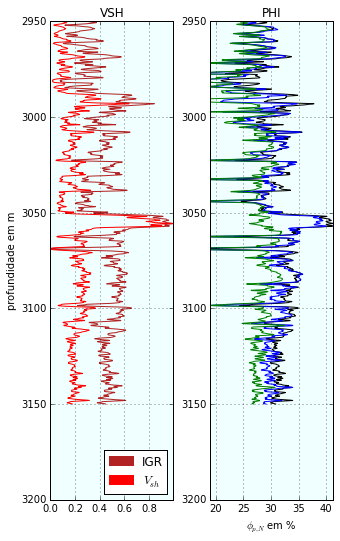

In [12]:
#---------------------Graficos 2 Dados Apenas para plotagem-------------------------------

fig = plt.figure(figsize= (16,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

ax8 = fig.add_subplot(6,6,1, axisbg='#F0FFFF')

ax8.plot(IGR,prof,'-',linewidth = 1,color='#B22222')
ax8.plot(VSH,prof,'-',linewidth = 1,color='red')

ax8label1 = mpatches.Patch(label='IGR',color='#B22222')
ax8label2 = mpatches.Patch(label='$V_{sh}$',color='red')


ax8.set_title('VSH')
ax8.set_xlabel(' ')
ax8.set_ylabel('profundidade em m')

plt.legend(handles=[ax8label1, ax8label2],loc=4)
plt.xlim(xmax=max(VSH),xmin=min(VSH))
plt.grid()

plt.gca().invert_yaxis()
#----------------------------------------------------------

ax9 = fig.add_subplot(6,6,2, axisbg='#F0FFFF')

ax9.plot(PHIN,prof,'-k',linewidth = 1)
ax9.plot(PHItd,prof,'-b',linewidth = 1)
ax9.plot(PHIe,prof,'-g',linewidth = 1)
ax9.set_title('PHI')
ax9.set_xlabel('$\phi _{p,N}$ em %')

ax9label1 = mpatches.Patch(label='PHIN',color='k')
ax9label2 = mpatches.Patch(label='PHItd',color='b')
ax9label3 = mpatches.Patch(label='PHIe',color='g')

plt.xlim(xmax=max(PHIN),xmin=min(PHIN))
plt.grid()

plt.gca().invert_yaxis()


plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Sismograma Sintético - Impedância Acústica -</font>

In [13]:
#---------------------Impedancia---(transformado de pe pra m)----------------------------
RHOsi = []

for i in range (p):
    RHOsi.append(RHOb[i]*0.001) # convertendo de g/cm3 para Kg/m3 (S.I.)

cfvp = 3.2808*(10**(-6)) # conversao us/ft -> s/m

VP=[] # velocidade de onda P
for i in range(p):
    VP.append(1.0000/(cfvp*DTP[i]))

    
#------------------------------------------Impedancia Acustica-----------------------------------#


z_imp = [] # Impedancia acustica (m/s).(g/cm3)
Z     = [] # Impedancia acustica (Km/s).(g/cm3)

for i in range (p):
    z_imp0 = (RHOsi[i]*VP[i]) # de olho no RHOsi e RHOb
    z_imp.append(z_imp0)
    Z.append(z_imp0*1000.000)
    
#--------------------------------------------------------------------------------------------------------#  

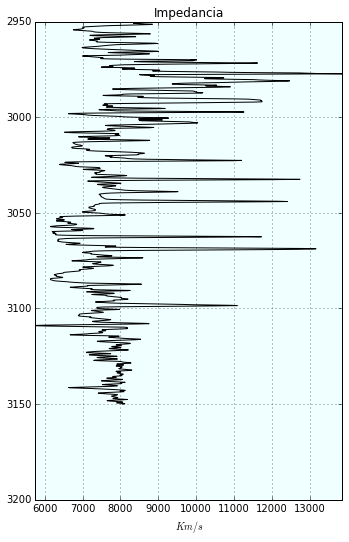

In [14]:
#---------------------Graficos 2 Dados Apenas para plotagem-------------------------------

fig = plt.figure(figsize= (40,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

#----------------------------------------------------------

ax9 = fig.add_subplot(6,6,1, axisbg='#F0FFFF')

ax9.plot(Z,prof,'-k',linewidth = 1)
ax9.set_title('Impedancia')
ax9.set_xlabel('$Km/s$')

ax9label1 = mpatches.Patch(label='PHIN',color='k')
ax9label2 = mpatches.Patch(label='PHItd',color='b')
ax9label3 = mpatches.Patch(label='PHIe',color='g')

plt.xlim(xmax=max(Z),xmin=min(Z))
plt.grid()

plt.gca().invert_yaxis()


plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Sismograma Sintético - Refletividade -</font>

In [15]:
#--------------------------------Refletividades---------------------

R  = [] # Refletividade

for i in range (p):
    if i == 0:
        RR = 0

    if i != 0:
        RR = (z_imp[i-1] - z_imp[i])/(z_imp[i-1] + z_imp[i])

    R.append(RR)

    
zero_bar = [0]*p


print VP [10]

3876.81970353


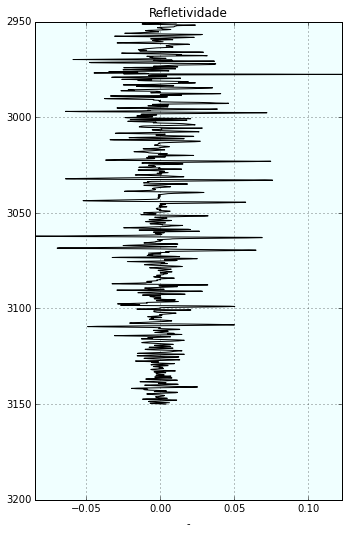

In [16]:
#---------------------Graficos 2 Dados Apenas para plotagem-------------------------------

fig = plt.figure(figsize= (40,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

#----------------------------------------------------------

ax9 = fig.add_subplot(6,6,1, axisbg='#F0FFFF')

ax9.plot(R,prof,'-k',linewidth = 1)
ax9.set_title('Refletividade')
ax9.set_xlabel('-')

ax9label1 = mpatches.Patch(label='PHIN',color='k')
ax9label2 = mpatches.Patch(label='PHItd',color='b')
ax9label3 = mpatches.Patch(label='PHIe',color='g')

plt.xlim(xmax=max(R),xmin=min(R))
plt.grid()

plt.gca().invert_yaxis()


plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Sismograma Sintético - Tempo -</font>

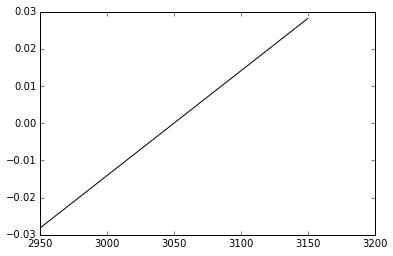

0.1524
3594.85283711
4.29316210525e-05
8.5863242105e-05


In [17]:
#---------------------------------------------time c(t)-----------------------------#
DL = prof[3]-prof[2]# valor do intervalo em m

T  = [] #tempo por intervalo padrao


for i in range (p):
    T.append(DL/VP[i])

#---------------------------------------------time c(t)-----------------------------#

# de 1313 elementos, o elemento 657 e central. No pyton, esse elemento e o 656

mp  = (p-1)/2 # termo central

dtf = [0.0]*mp
dtb = [0.0]*mp

#----------------------------------------------------#

for i in range (mp):
    dtf[i] = np.mean(T)
    dtb[i] = -(np.mean(T))
    
for i in range (1,mp):
    dtf[i]  = dtf[i- 1] + dtf[i]
    
for i in range (1,mp):
    dtb[i]  = dtb[i -1] + dtb[i]

    
dtb.reverse()


TT  = [0.0]*p

for i in range (len(dtb)):
    TT[i]  = dtb[i]

for i in range (mp+1,p):
    TT[i]  = dtf[i-mp-1]

    
plt.plot(prof,TT,'-k')
plt.show()

print DL
print mean (VP)
print mean (T)
print TT[658]

<br><center><font face="Times New ROman" size="6" color="#000000">- Sismograma Sintético - Wavlet -</font>

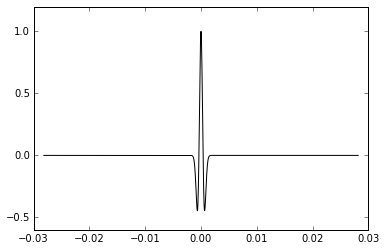

In [18]:
#wavlet

A = 1.000000
f = 600 #30.000 # 133
ff = str(f) + " - Hz"
j = 400

wav = []
for i in range (len(TT)):
    a = f
    EE1 = -(np.pi**2)*(a**2)*(TT[i]**2)
    wav01 = A*(1 - (2*(np.pi**2)) * (a**2) * (TT[i]**2))*np.exp(EE1) # 2497.55919007
    wav.append(wav01)

    
    
plt.plot(TT,wav,'-k')
plt.show()

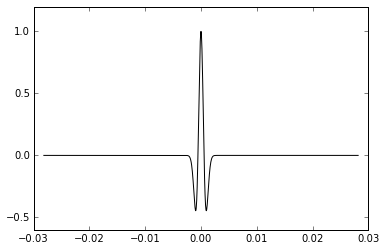

In [19]:
#wavlet

A1 = 1.000000
f1 = 410 #30.000 # 133
ff1 = str(f1) + " - Hz"
j1 = 400

wav1 = []
for i in range (len(TT)):
    a1 = f1
    EE2 = -(np.pi**2)*(a1**2)*(TT[i]**2)
    wav02 = (1 - (2*(np.pi**2)) * (a1**2) * (TT[i]**2))*np.exp(EE2) # 2497.55919007
    wav1.append(wav02)

plt.plot(TT,wav1,'-k')
plt.show()

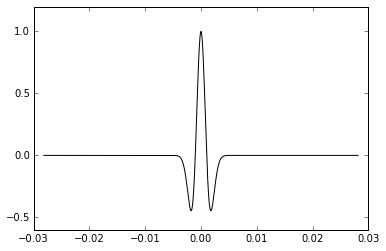

In [20]:
#wavlet

A2 = 1.000000
f2 = 220 #30.000 # 133
ff2 = str(f2) + " - Hz"
j2 = 400

wav2 = []
for i in range (len(TT)):
    a2 = f2
    EE3 = -(np.pi**2)*(a2**2)*(TT[i]**2)
    wav03 = (1 - (2*(np.pi**2)) * (a2**2) * (TT[i]**2))*np.exp(EE3) # 2497.55919007
    wav2.append(wav03)

plt.plot(TT,wav2,'-k')
plt.show()

30 - Hz


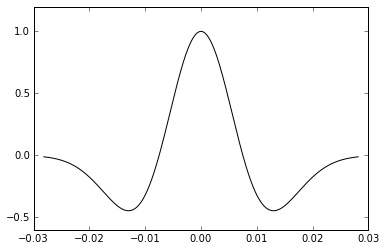

In [21]:
#wavlet

A3 = 1.000000
f3 = 30
ff3 = str(f3) + " - Hz" # transforma em string
j3 = 400
print ff3

wav3 = []
for i in range (len(TT)):
    a3 = A3*f3
    EE4 = -(np.pi**2)*(a3**2)*(TT[i]**2)
    wav04 = (1 - (2*(np.pi**2)) * (a3**2) * (TT[i]**2))*np.exp(EE4) # 2497.55919007
    wav3.append(wav04)

    
    
plt.plot(TT,wav3,'-k')
plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Sismograma Sintético - Sinal -</font>

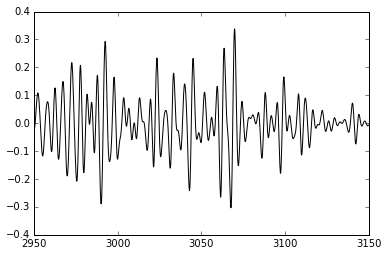

In [22]:
# Convolucao

signal  = np.convolve(R,wav,'same')  # wavlet convolucao Padrao


plt.plot(prof,signal,'-k')
plt.xlim(xmax=prof[p-1])
plt.show()

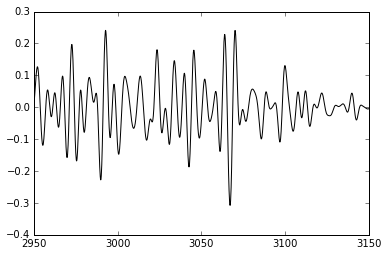

In [23]:
# Convolucao

signal1  = np.convolve(R,wav1,'same')  # wavlet convolucao Padrao

plt.plot(prof,signal1,'-k')
plt.xlim(xmax=prof[p-1])
plt.show()

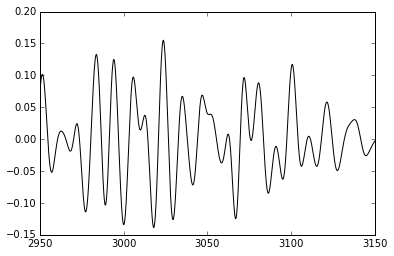

In [24]:
# Convolucao

signal2  = np.convolve(R,wav2,'same')  # wavlet convolucao Padrao

plt.plot(prof,signal2,'-k')
plt.xlim(xmax=prof[p-1])
plt.show()

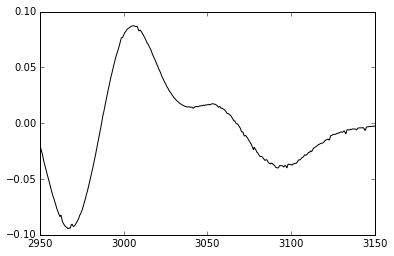

In [25]:
# Convolucao

signal3  = np.convolve(R,wav3,'same')  # wavlet convolucao Padrao

plt.plot(prof,signal3,'-k')
plt.xlim(xmax=prof[p-1])
plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Resultados -</font>

In [26]:
#---------------------------------Medidas-Estatisticas------------------------------------#
medVP = np.mean(VP) # media
maxVP = max    (VP) # maximo
minVP = min    (VP) # minimo
varVP = np.var (VP) # variancia
stdVP = np.std (VP) # desvio padrao
#----------------------------------------------#
print "-----------valores de VP-------------"
print medVP,"m/s   - media "
print maxVP,"m/s   - valor maximo"
print minVP,"m/s   - valor minimo"
print varVP,"m²/s² - variancia"
print stdVP,"m/s   - desvio padrao"
print "-------------------------------------"


-----------valores de VP-------------
3594.85283711 m/s   - media 
5646.99148354 m/s   - valor maximo
2708.49955937 m/s   - valor minimo
187603.013242 m²/s² - variancia
433.131635005 m/s   - desvio padrao
-------------------------------------


In [27]:
#-----------------------------------------Porosidade Sonica-------------------------------------------

PHIts = []
PHIes = []
gas   = []

DTPsh = DTP[Psh]
for i in range (p):
    
    PHIts.append(((DTP[i] - DTPma)/(DTPf - DTPma))*100.0)    # Porosidade total - perfil sonico
    PHIes.append((((((DTP[i] - DTPma)/(DTPf - DTPma))) - ((VSH[i])*(DTPsh - DTPma)/(DTPf - DTPma))))*100.00)

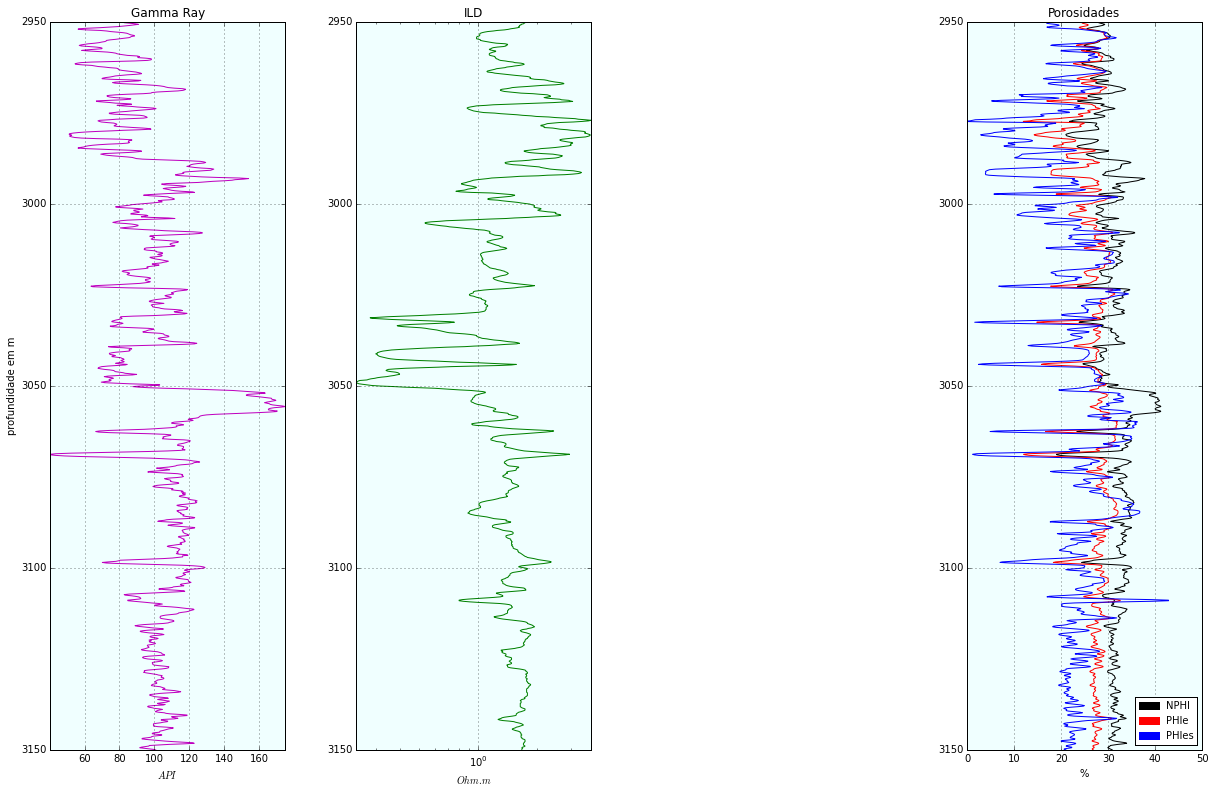

In [28]:
fig = plt.figure(figsize= (20,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

ax2 = fig.add_subplot(4,4,1, axisbg='#F0FFFF')   

ax2.plot(GR,prof,'-m',linewidth = 1)            # repare que esta DTP x prof, ou seja, Sonico(x) e profundidade(y)

ax2.set_title('Gamma Ray')                             # aqui o titulo 
ax2.set_xlabel('$API$')                     # aqui o que representa o eixo x
ax2.set_ylabel('profundidade em m')              # aqui o que representa o eixo y

#                         # invertendo o eixo y pois a profundidade aumenta para baixo

plt.xlim(xmax=max(GR),xmin=min(GR))     
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.gca().invert_yaxis()
plt.grid()

#-------------------------------------------------------------------------------------------------#

ax2 = fig.add_subplot(4,4,2, axisbg='#F0FFFF')   

ax2.semilogx(ILD,prof,'-g',linewidth = 1)            # repare que esta DTP x prof, ou seja, Sonico(x) e profundidade(y)

ax2.set_title('ILD')                             # aqui o titulo 
ax2.set_xlabel('$Ohm.m$')                     

plt.xlim(xmax=max(ILD),xmin=min(ILD))     
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.gca().invert_yaxis()
plt.grid()

#----------------------------------------------------------------------------------------------------#
ax2 = fig.add_subplot(4,4,4, axisbg='#F0FFFF')   

ax2.plot(PHIN,prof,'-k',linewidth = 1)
ax2.plot(PHIe,prof,'-r',linewidth = 1)
#ax2.plot(PHItd,prof,'-m',linewidth = 1)
ax2.plot(PHIes,prof,'-b',linewidth = 1)
#ax2.plot(PHIts,prof,'-c',linewidth = 1)

ax2label1 = mpatches.Patch(label='NPHI',color='k')
ax2label2 = mpatches.Patch(label='PHIe',color='r')
ax2label3 = mpatches.Patch(label='PHIes',color='b')

ax2.set_title('Porosidades') 
ax2.set_xlabel('%')                     

plt.legend(handles=[ax2label1, ax2label2, ax2label3],loc=4,fontsize=10) # fontsize = tamanho da fonte
plt.xlim(xmax=50,xmin=0.0)     
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.gca().invert_yaxis()
plt.grid()

plt.show()

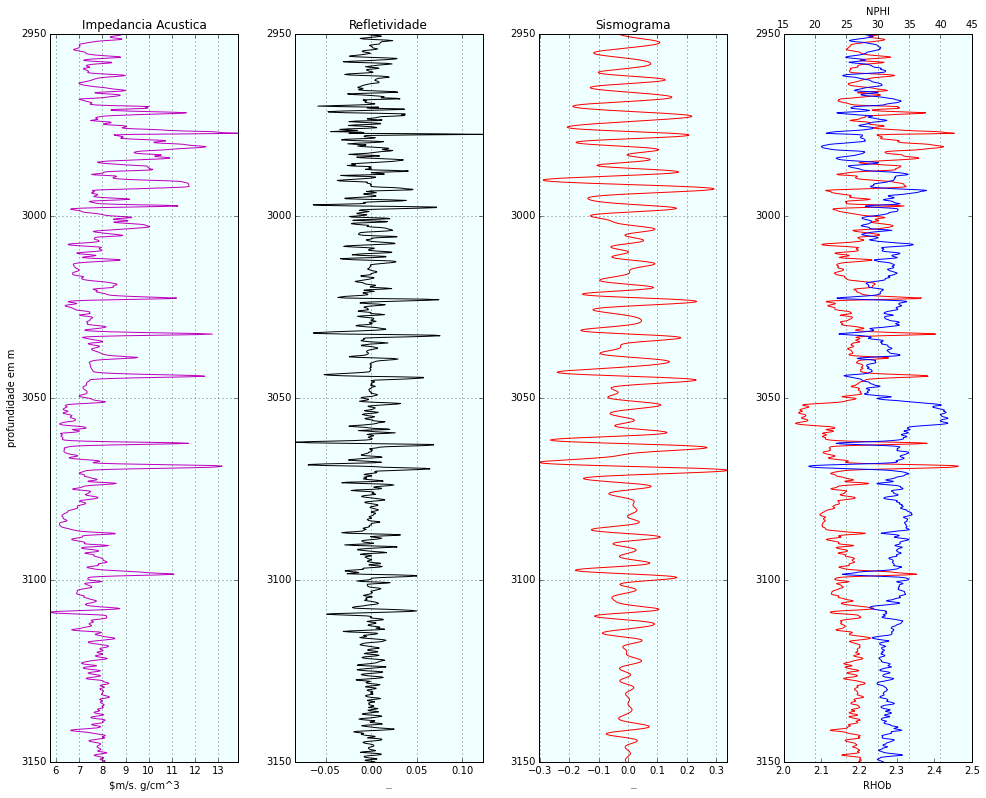

In [29]:
#---------------------Graficos 2 Dados Apenas para plotagem-------------------------------

fig = plt.figure(figsize= (16,60))
fig.subplots_adjust(left=0.1, wspace=0.3)

ax8 = fig.add_subplot(4,4,1, axisbg='#F0FFFF')

ax8.plot(z_imp,prof,linewidth = 1,color='m')


ax8.set_title('Impedancia Acustica')
ax8.set_xlabel('$m/s. g/cm^3')
ax8.set_ylabel('profundidade em m')

plt.xlim(xmax=max(z_imp),xmin=min(z_imp))
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.grid()

plt.gca().invert_yaxis()
#----------------------------------------------------------

ax7 = fig.add_subplot(4,4,2, axisbg='#F0FFFF')


ax7.plot(R,prof,'-k',linewidth = 1)  #
ax7.set_title('Refletividade')
ax7.set_xlabel('$-$')

plt.xlim(xmax=max(R),xmin=min(R))
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.grid()

plt.gca().invert_yaxis()

#----------------------------------------------------------

ax6 = fig.add_subplot(4,4,3, axisbg='#F0FFFF')

ax6.plot(signal,prof,'-r',linewidth = 1) # augusto
ax6.set_title('Sismograma')
ax6.set_xlabel('$-$')

#plt.xlim(xmax=max(difVPVPs),xmin=min(difVPVPs))
plt.xlim(xmax=max(signal),xmin=min(signal))
plt.ylim(ymax=max(prof),ymin=min(prof))
plt.grid()

plt.gca().invert_yaxis()

#----------------------------------------------------------

ax23 = fig.add_subplot(4,4,4, axisbg='#F0FFFF')

ax23.plot(RHOb,prof,'-r',linewidth = 1)
#ax23.xlim(xmax=2.95,xmin=1.95)
ax23.set_xlabel('RHOb')

ax24 = ax23.twiny()

ax24.plot(PHIN,prof,'-b',linewidth = 1)
ax24.set_xlabel('NPHI')

plt.ylim(ymax=max(prof),ymin=min(prof))
plt.grid()

plt.gca().invert_yaxis()

plt.show()

In [30]:
vals = 300

DD = [signal]*vals
DD = np.array(DD)
DD = np.transpose(DD)

DD1 = [signal1]*vals
DD1 = np.array(DD1)
DD1 = np.transpose(DD1)

DD2 = [signal2]*vals
DD2 = np.array(DD2)
DD2 = np.transpose(DD2)

DD3 = [signal3]*vals
DD3 = np.array(DD3)
DD3 = np.transpose(DD3)


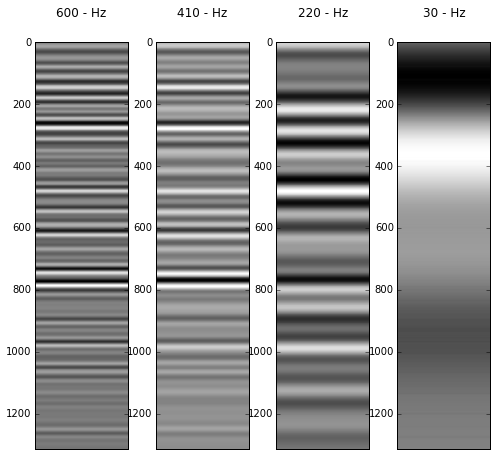

In [31]:
#------------------------------------------#

fig = plt.figure(figsize= (10,200))
fig.subplots_adjust(left=0.1, wspace=0.3)

ax1 = fig.add_subplot(5,5,1, axisbg='#F0FFFF')
ax1.matshow(DD,cmap=cm.gray)

ax1.set_title(ff)

ax1.axes.get_xaxis().set_visible(False)
#ax1.axes.get_yaxis().set_visible(False)

#------------------------------------------#

ax2 = fig.add_subplot(5,5,2, axisbg='#F0FFFF')
ax2.matshow(DD1,cmap=cm.gray)

ax2.set_title(ff1)

ax2.axes.get_xaxis().set_visible(False)
#ax1.axes.get_yaxis().set_visible(False)

#------------------------------------------#

ax3 = fig.add_subplot(5,5,3, axisbg='#F0FFFF')
ax3.matshow(DD2,cmap=cm.gray)

ax3.set_title(ff2)

ax3.axes.get_xaxis().set_visible(False)
#ax1.axes.get_yaxis().set_visible(False)

#------------------------------------------#

ax4 = fig.add_subplot(5,5,4, axisbg='#F0FFFF')
ax4.matshow(DD3,cmap=cm.gray)

ax4.set_title(ff3)

ax4.axes.get_xaxis().set_visible(False)
#ax1.axes.get_yaxis().set_visible(False)

show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Banco de Dados - Exportando Valores -</font>

In [32]:
X = [352375.000]*p
Y = [7518585.000]*p

#-----------Nota: caso o sonico nao exista, os valores de augusto e siqueira sao os originais.
#-----------Caso contrario, sao os modelos testados

filef = np.array([[-999.000]*14]*p)
filef[:,0] = X
filef[:,1] = Y
filef[:,2] = prof   # profundidade
filef[:,3] = DTP    # sonico 
filef[:,4] = GR     # gama ray
filef[:,5] = ILD    # resistividade
filef[:,6] = PHIN   # porosidade neutronica
filef[:,7] = RHOb   # densidade

#----------------Siqueira----------------------#

filef[:,8] = z_imp  # Impedancia acustica
filef[:,9] = R      # Refletividade
filef[:,10] = signal # Sismograma sintetico

#----------------Augusto-----------------------#

filef[:,11]= z_imp  # Impedancia acustica
filef[:,12]= R      # Refletividade
filef[:,13]= signal # Sismograma sintetico

np.savetxt('na09_mario.dat', filef, delimiter=' ', fmt='%.4f')